Goal of notebook is to test various rotation technics


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

import descriptor as desc

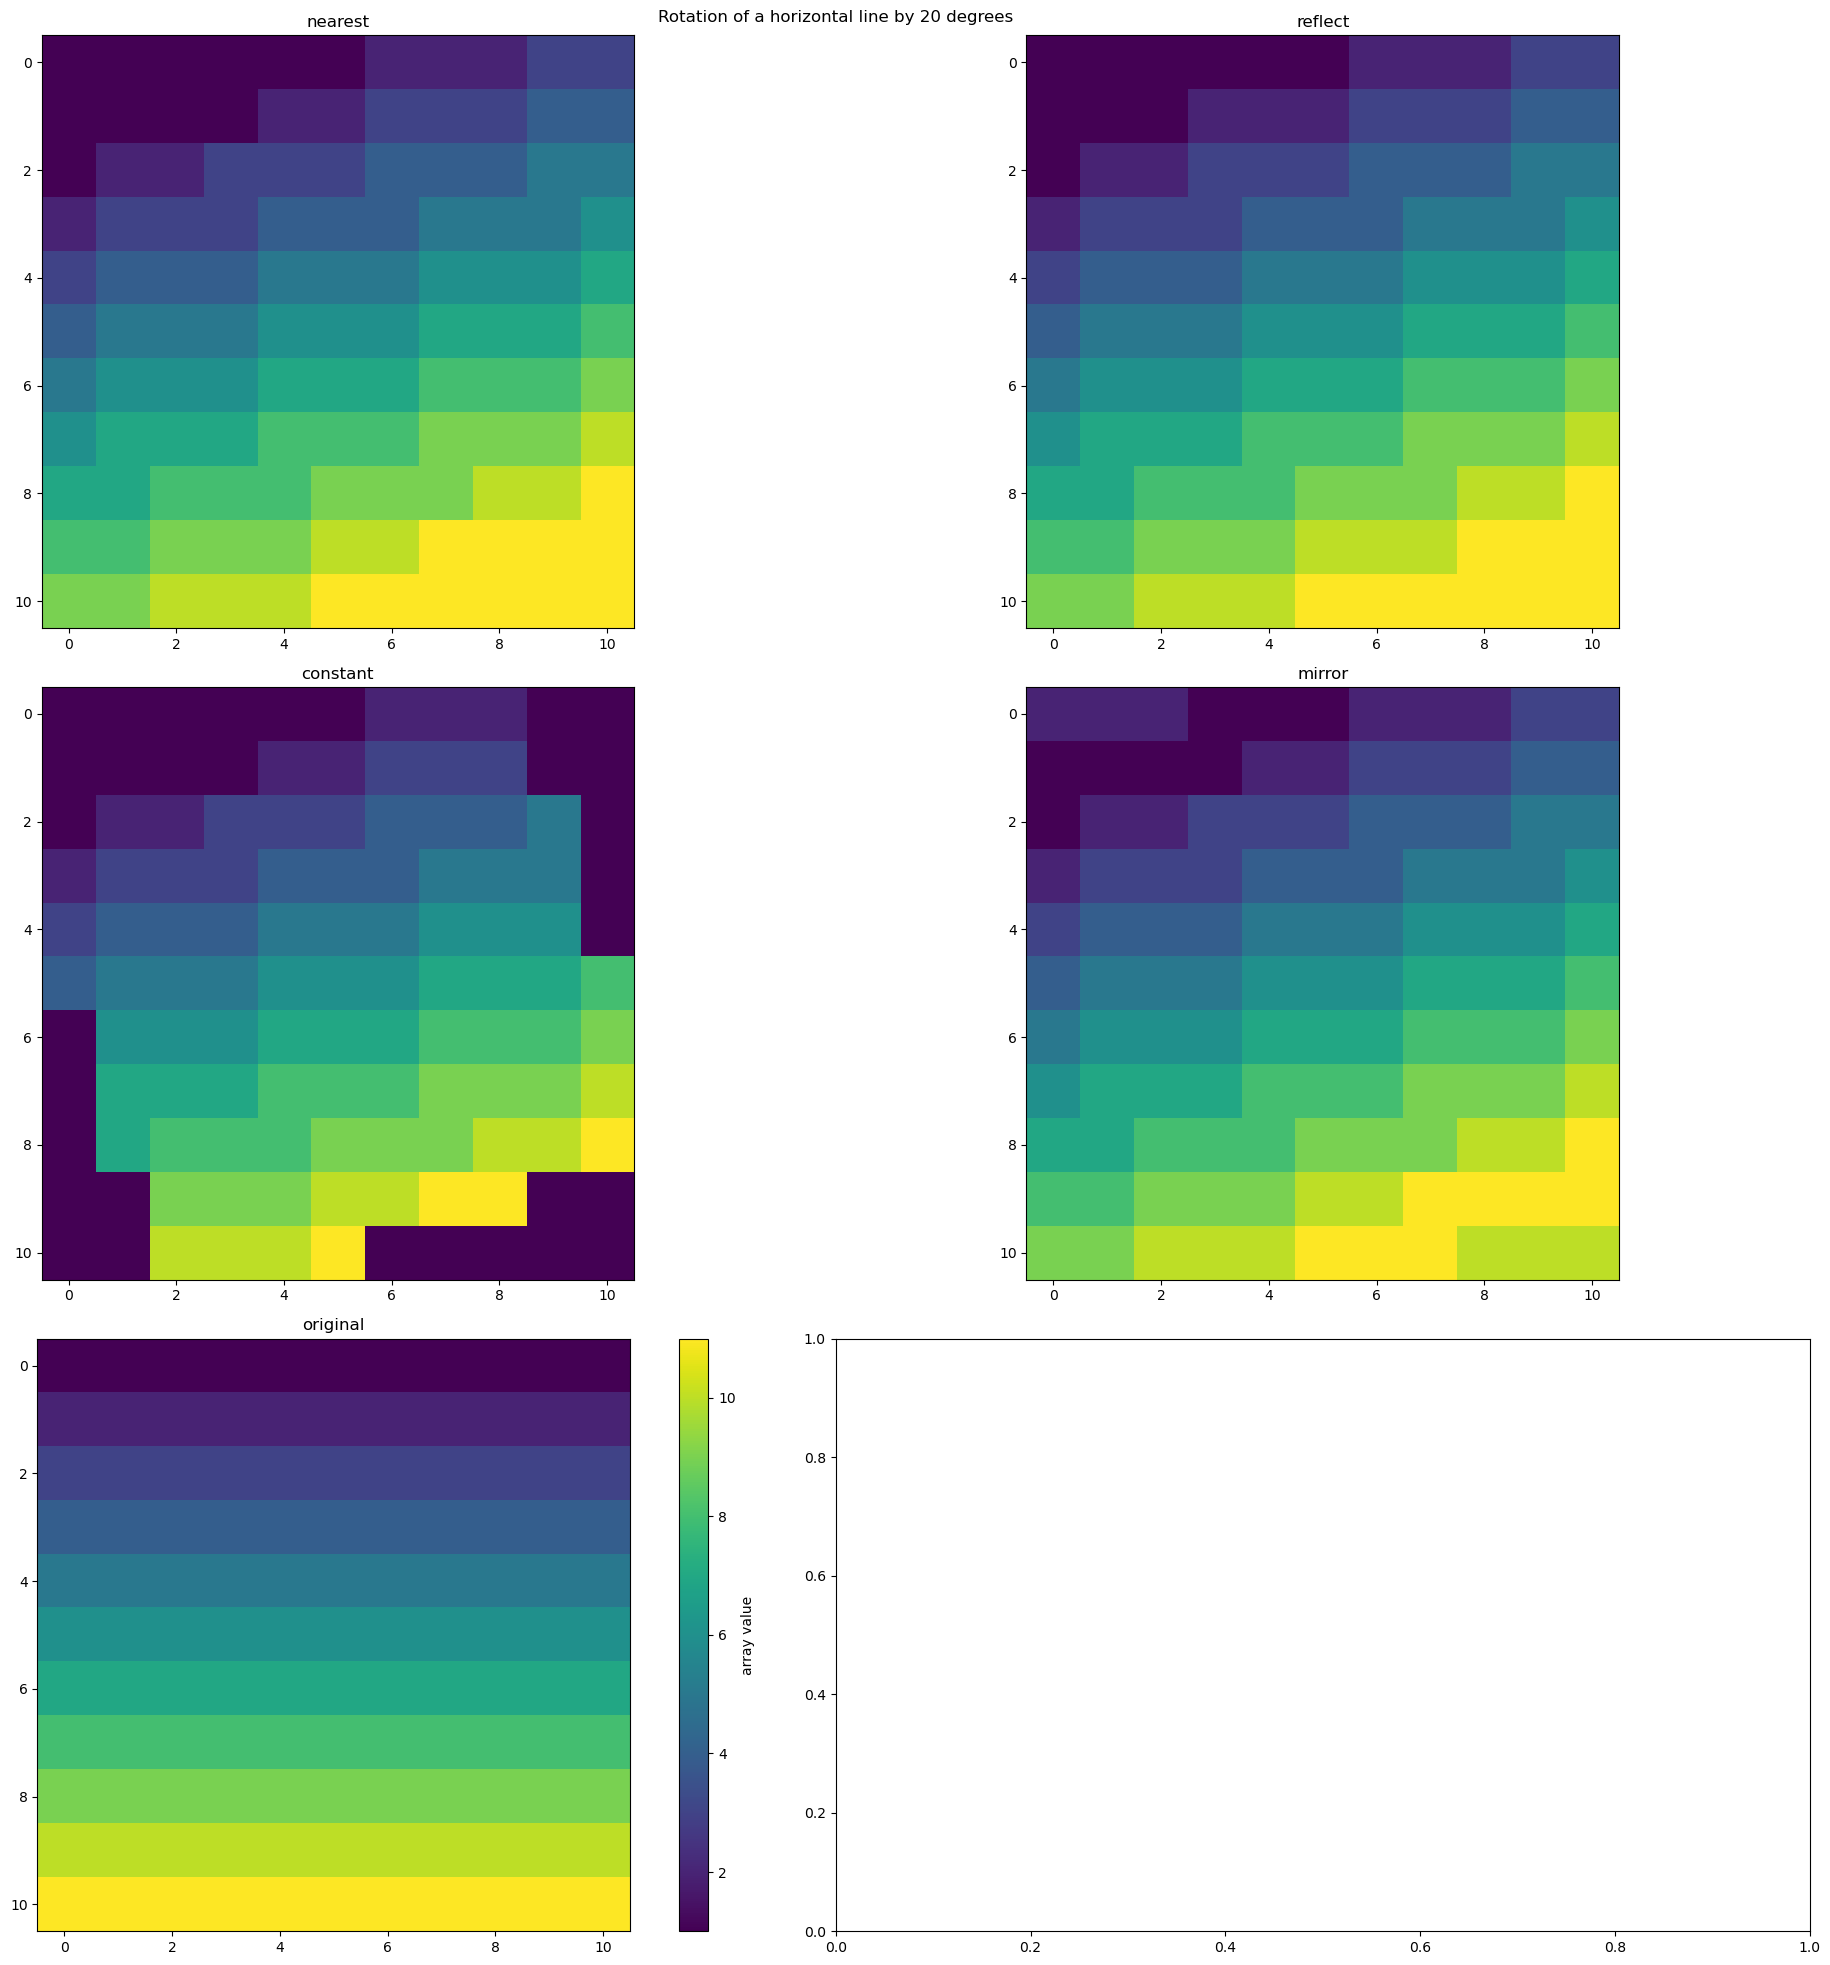

In [2]:
side_length = 11
coord_arr = np.indices((side_length, side_length)).transpose(1, 2, 0)
coord_arr[:, :, 0] += 1
vmin, vmax = coord_arr[:, :, 0].min(), coord_arr[:, :, 0].max()

angle = 20
rotated_coord_arr_nearest = ndimage.rotate(
    coord_arr, angle, reshape=False, mode="nearest"
)
rotated_coord_arr_reflect = ndimage.rotate(
    coord_arr, angle, reshape=False, mode="reflect"
)
rotated_coord_arr_constant = ndimage.rotate(
    coord_arr, angle, reshape=False, mode="constant"
)
rotated_coord_arr_mirror = ndimage.rotate(
    coord_arr, angle, reshape=False, mode="mirror"
)

fig, axs = plt.subplots(3, 2, figsize=(20, 20))

axs[0, 0].imshow(rotated_coord_arr_nearest[:, :, 0], vmin=vmin, vmax=vmax)
axs[0, 0].set_title("nearest")

axs[0, 1].imshow(rotated_coord_arr_reflect[:, :, 0], vmin=vmin, vmax=vmax)
axs[0, 1].set_title("reflect")

axs[1, 0].imshow(rotated_coord_arr_constant[:, :, 0], vmin=vmin, vmax=vmax)
axs[1, 0].set_title("constant")

axs[1, 1].imshow(rotated_coord_arr_mirror[:, :, 0], vmin=vmin, vmax=vmax)
axs[1, 1].set_title("mirror")

axs[2, 0].imshow(coord_arr[:, :, 0], vmin=vmin, vmax=vmax)
axs[2, 0].set_title("original")
# add colorbar
cbar = fig.colorbar(
    axs[2, 0].imshow(coord_arr[:, :, 0], vmin=vmin, vmax=vmax), ax=axs[2, 0]
)
cbar.ax.set_ylabel("array value")

# add subplot title
fig.suptitle(f"Rotation of a horizontal line by {angle} degrees")

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
plt.show()

In [3]:
radius = 8
neigh_width = 2 * radius + 1
# compute upper bound on the width of the rotated array (reached when angle=45 degrees)
# to minimize the size of the bigger neighborhood
maj_rot_neigh_width = (
    2 * int(1 / 2 * np.ceil(neigh_width * np.sqrt(2))) + 1
)  # to have it odd
maj_rot_neigh_width

25

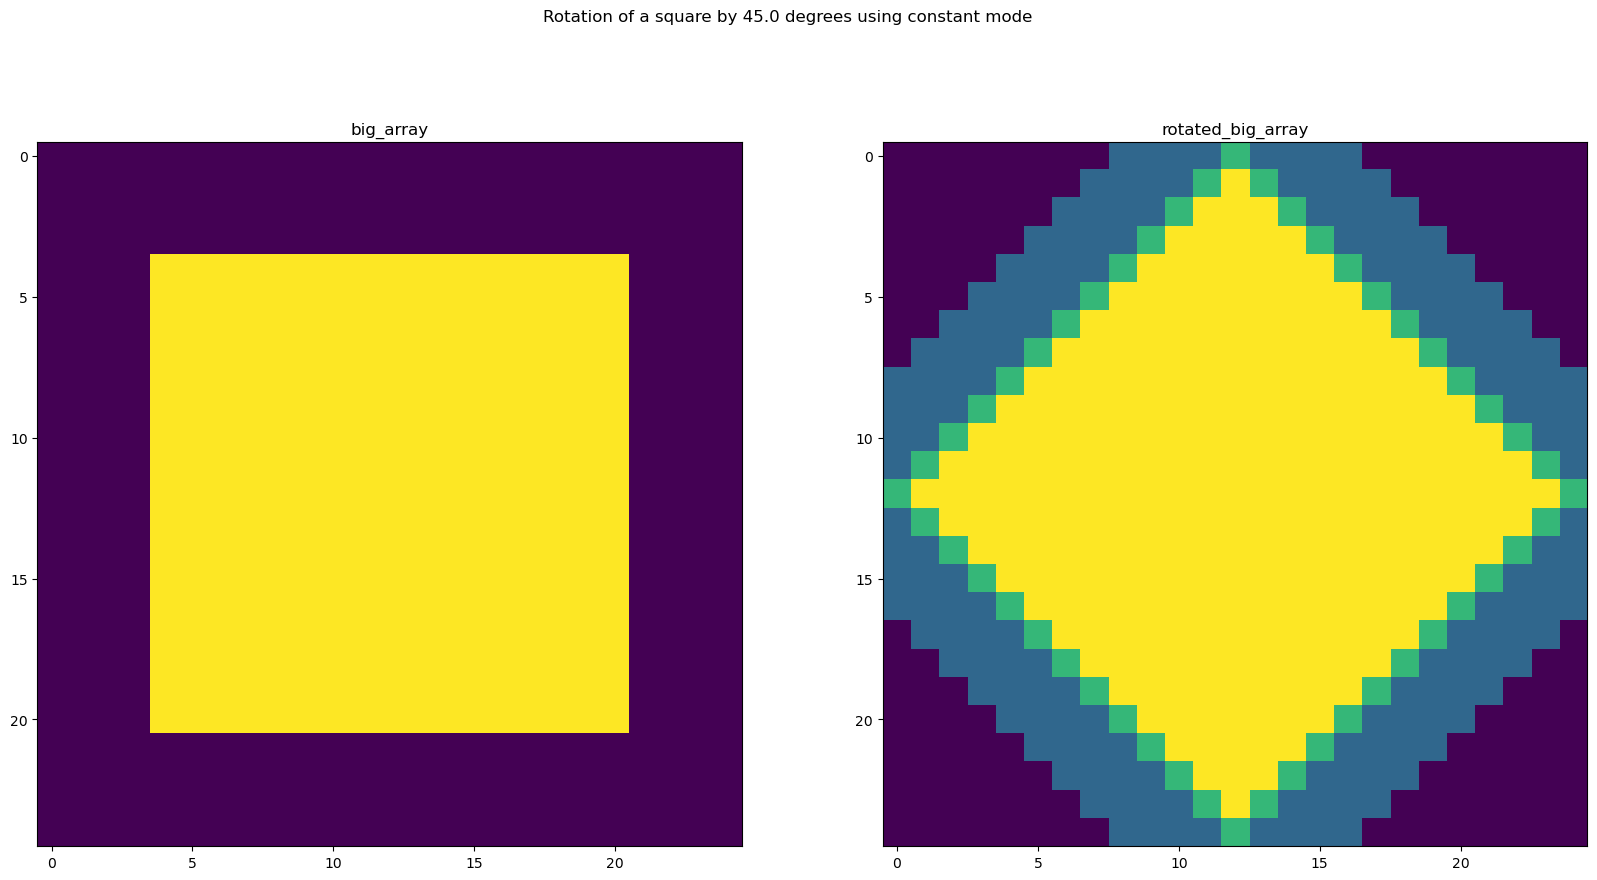

In [4]:
big_radius = maj_rot_neigh_width // 2
big_array = np.ones((big_radius * 2 + 1, big_radius * 2 + 1), dtype=np.uint8)
smaller_array_slice = slice(big_radius - radius, big_radius + radius + 1)
big_array[smaller_array_slice, smaller_array_slice] = 3

angle = 45.0
mode = "constant"
rotated_big_array = ndimage.rotate(big_array, angle, reshape=False, mode=mode)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(big_array)
axs[0].set_title("big_array")

axs[1].imshow(rotated_big_array)
axs[1].set_title("rotated_big_array")

# add subplot title
fig.suptitle(f"Rotation of a square by {angle} degrees using {mode} mode")

plt.show()

We see the spline interpolation


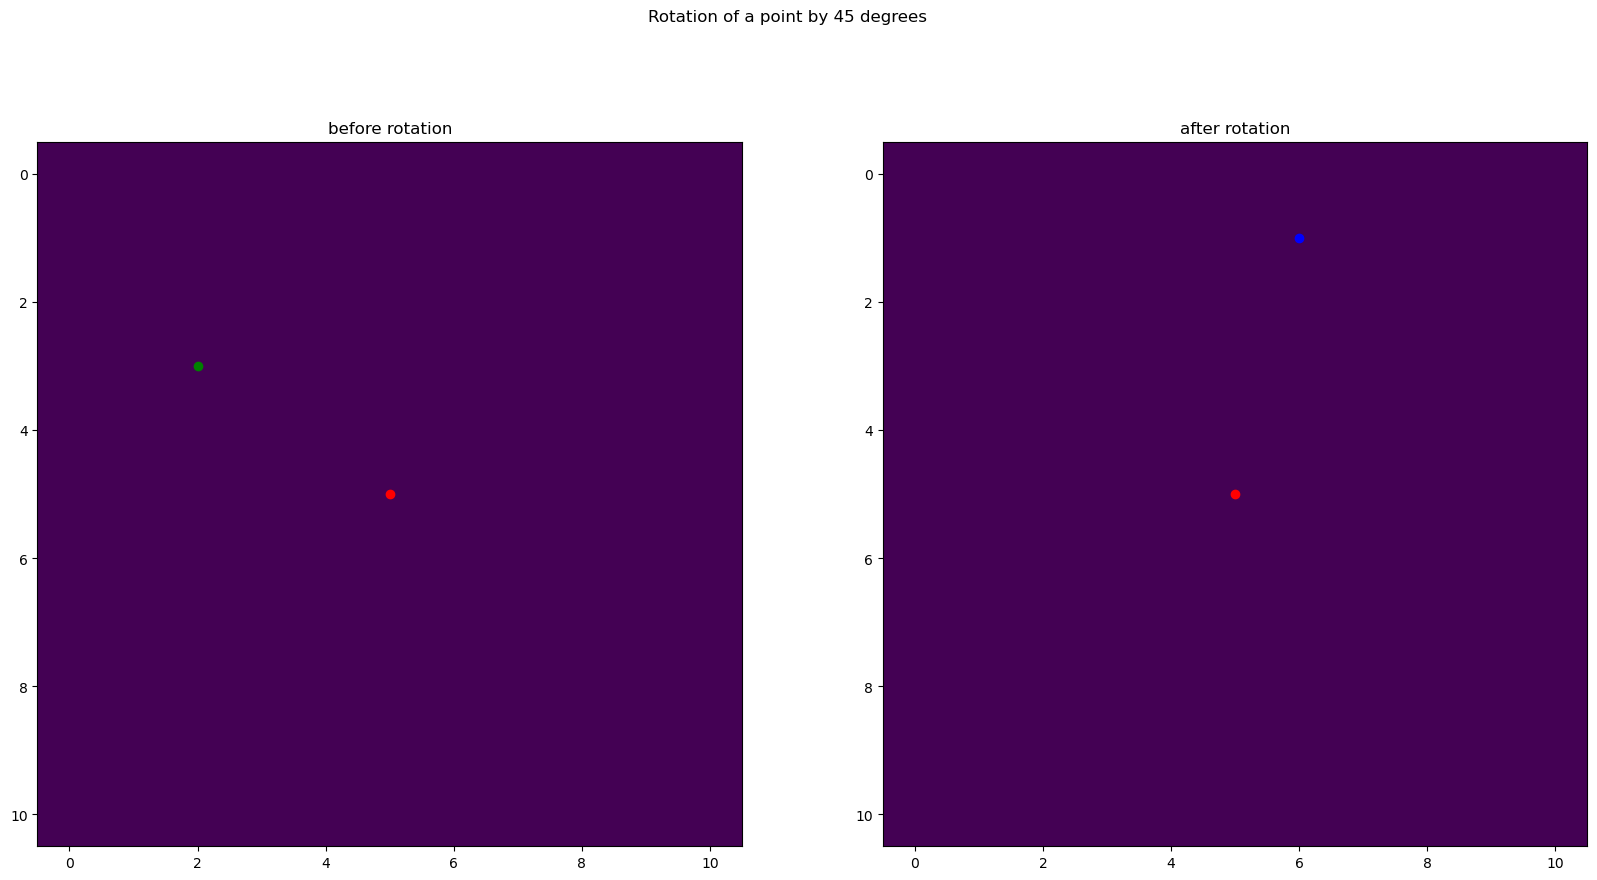

In [5]:
arr = np.ones(shape=(11, 11), dtype=np.uint8)
center = (5, 5)
point = (2, 3)
angle = 45
rotated_point = desc.rotate_point_pixel(point[1], point[0], angle, center[1], center[0])

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# before rotation
axs[0].imshow(arr)
axs[0].plot(point[0], point[1], "go")
axs[0].plot(center[0], center[1], "ro")
axs[0].set_title("before rotation")

# after rotation
axs[1].imshow(arr)
axs[1].plot(rotated_point[0], rotated_point[1], "bo")
axs[1].plot(center[0], center[1], "ro")
axs[1].set_title("after rotation")

# add subplot title
fig.suptitle(f"Rotation of a point by {angle} degrees")

plt.show()

point: (2, 3)
rotated_point: (6, 1)


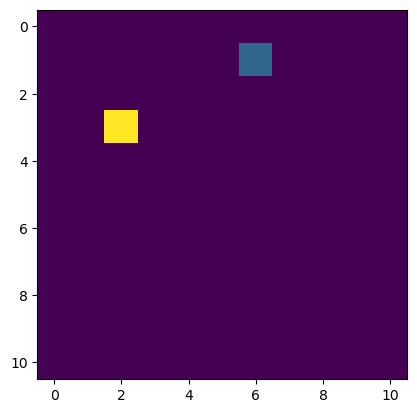

In [6]:
print(f"point: {point}")
print(f"rotated_point: {rotated_point}")


arr[rotated_point[1], rotated_point[0]] = 2
arr[point[1], point[0]] = 4

plt.imshow(arr)
plt.show()

even with a downward vertical axis, rotation is counterclockwise
